┌ Info: y(1.2) ≈ 1.375
└ @ Main /Users/rafif/Documents/Purdue First Year/gradcourses/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W0sZmlsZQ==.jl:61


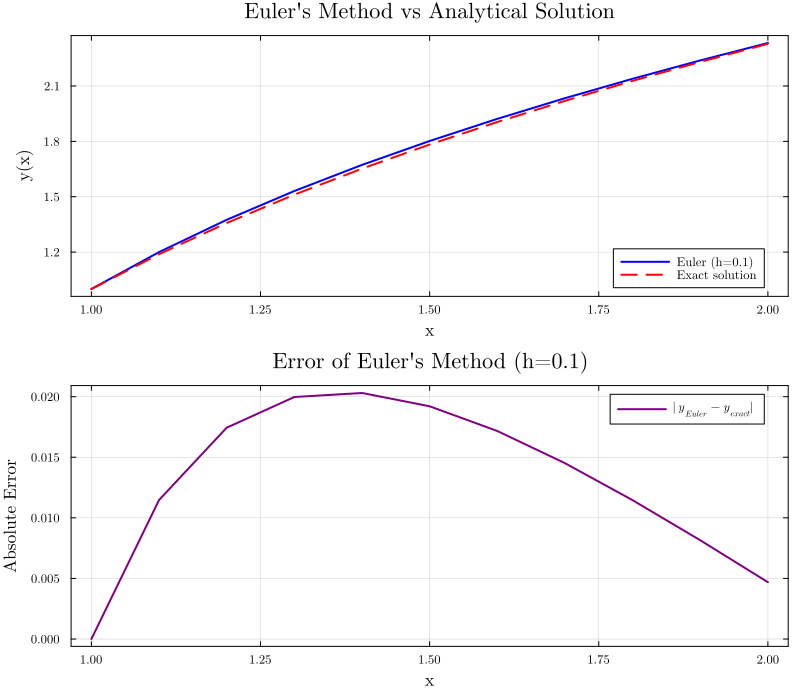

In [3]:
using Plots, LaTeXStrings

# --- Define the ODE system ---
# (2x^2)y'' + 3xy' - y = 0
# => y1' = y2
# => y2' = (y1 - 3x*y2) / (2x^2)

function euler_cauchy(x0, y0, v0, h, x_end)
    xs = [x0]
    ys = [y0]
    vs = [v0]
    x, y, v = x0, y0, v0

    while x < x_end - 1e-12
        dy = v
        dv = (y - 3x*v) / (2x^2)
        y_new = y + h*dy
        v_new = v + h*dv
        x_new = x + h

        push!(xs, x_new)
        push!(ys, y_new)
        push!(vs, v_new)

        x, y, v = x_new, y_new, v_new
    end
    return xs, ys, vs
end

# --- Exact solution ---
y_exact(x) = 2*sqrt(x) - 1/x

# --- Parameters ---
x0, y0, v0 = 1.0, 1.0, 2.0
h = 0.1
x_end = 2.0

# --- Run Euler's method ---
xs, ys, vs = euler_cauchy(x0, y0, v0, h, x_end)

# --- Compute exact solution and errors ---
y_exact_vals = [y_exact(x) for x in xs]
abs_error = abs.(ys .- y_exact_vals)

# --- Plot 1: Solution comparison ---
p1 = plot(xs, ys, label="Euler (h=0.1)", lw=2, color=:blue, fontfamily="Computer Modern")
plot!(p1, xs, y_exact_vals, label="Exact solution", lw=2, ls=:dash, color=:red)
xlabel!(p1, "x")
ylabel!(p1, "y(x)")
title!(p1, "Euler's Method vs Analytical Solution")
plot!(p1, legend=:bottomright, framestyle=:box)

# --- Plot 2: Absolute error ---
p2 = plot(xs, abs_error, lw=2, color=:purple, label=L"|y_{Euler} - y_{exact}|", fontfamily="Computer Modern")
xlabel!(p2, "x")
ylabel!(p2, "Absolute Error")
title!(p2, "Error of Euler's Method (h=0.1)")
plot!(p2, legend=:topright, framestyle=:box)

# --- Display results ---
@info "y(1.2) ≈ $(ys[findfirst(x -> x ≈ 1.2, xs)])"
plot(p1, p2, layout=(2,1), size=(800,700))